In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

C:\Users\omerf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

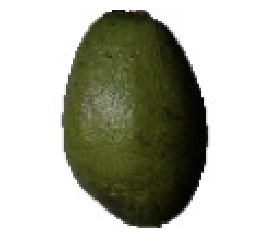

In [4]:
img = load_img(train_path + "Avocado/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [7]:
numberOfClass = len(glob(train_path+"/*"))
print(numberOfClass)

118


In [8]:
vgg = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 351s 1us/step


In [0]:
print(vgg.summary())
print(type(vgg))

In [0]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

In [0]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [0]:
print(model.summary())

In [0]:
for layers in model.layers:
    layers.trainable = False

In [0]:
model.add(Dense(numberOfClass, activation="softmax"))

In [0]:
print(model.summary())

In [0]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [0]:
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224))

batch_size = 32

In [0]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs= 25,
                           validation_data=test_data,
                           validation_steps= 800//batch_size)

In [0]:
model.save_weights("transfer_learning_model.h5")

In [0]:
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["acc"],label = "training acc")
plt.plot(hist.history["val_acc"],label = "validation acc")
plt.legend()
plt.show()
plt.savefig("transfer_learning_model.png")